## Simple GRU

## Create Training Data

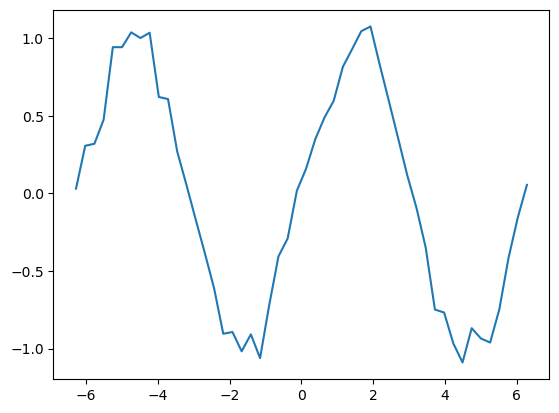

(40, 10, 1)
(40, 10, 1)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi) # x_data = [-2π, 2π]
sin_data = np.sin(x_data) + 0.1 * np.random.randn(len(x_data)) # sin_data = sin(x_data) + 0.1 * noise

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10 # number of RNN units
n_sample = len(x_data) - n_rnn # number of samples
x= np.zeros((n_sample, n_rnn)) # input data
t = np.zeros((n_sample, n_rnn)) # output data
for i in range(0, n_sample):
    x[i] = sin_data[i:i+n_rnn]
    t[i] = sin_data[i+1:i+n_rnn+1] # t is shifted by 1 from x

x = x.reshape(n_sample, n_rnn, 1) # reshape to 3D array
t = t.reshape(n_sample, n_rnn, 1)
print(x.shape)
print(t.shape)

## Create LSTM model and GRU model

In [2]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

batch_size = 8
n_in = 1
n_hidden = 20
n_out = 1

# create lstm model
model_lstm = Sequential()
model_lstm.add(LSTM(n_hidden, input_shape=(n_rnn, n_in), return_sequences=True))
model_lstm.add(Dense(n_out, activation='linear'))
model_lstm.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

# create gru model
model_gru = Sequential()
model_gru.add(GRU(n_hidden, input_shape=(n_rnn, n_in), return_sequences=True))
model_gru.add(Dense(n_out, activation='linear'))
model_gru.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

model_gru.summary()
model_lstm.summary()

2023-03-02 17:54:17.319633: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 20)            1380      
                                                                 
 dense_1 (Dense)             (None, 10, 1)             21        
                                                                 
Total params: 1,401
Trainable params: 1,401
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            1760      
                                                                 
 dense (Dense)               (None, 10, 1)             21        
                                                                 
Total params: 1,781
Trainable pa

## Train LSTM model and GRU model

In [3]:
import time

epochs = 1000

# train lstm model
start = time.time()
history_lstm = model_lstm.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
elapsed_time_lstm = time.time() - start

# train gru model
start = time.time()
history_gru = model_gru.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
elapsed_time_gru = time.time() - start

print('elapsed_time_lstm: ', elapsed_time_lstm)
print('elapsed_time_gru: ', elapsed_time_gru)

elapsed_time_lstm:  48.44202518463135
elapsed_time_gru:  69.82089591026306


## History

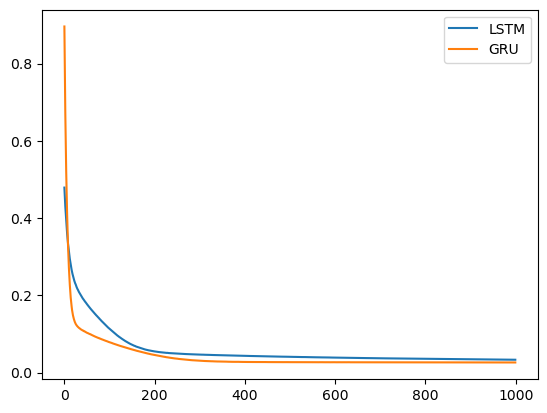

In [4]:
loss_gru = history_gru.history['loss']
loss_lstm = history_lstm.history['loss']

plt.plot(range(epochs), loss_lstm, label='LSTM')
plt.plot(range(epochs), loss_gru, label='GRU')
plt.legend()
plt.show()

## Predict

1/1 [==============================] - 0s 86ms/step


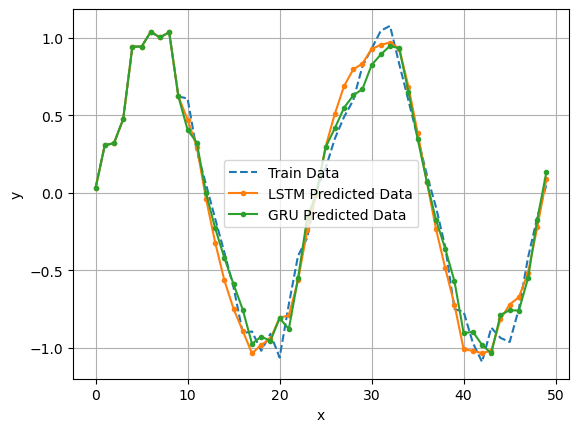

In [5]:
predicted_gru = x[0].reshape(-1)
predicted_lstm = x[0].reshape(-1)

for i in range(0, n_sample):
    xhat = x[i].reshape(1, n_rnn, 1)
    yhat_gru = model_gru.predict(xhat)
    predicted_gru = np.append(predicted_gru, yhat_gru[0][-1])
    yhat_lstm = model_lstm.predict(xhat)
    predicted_lstm = np.append(predicted_lstm, yhat_lstm[0][-1])

plt.plot(range(len(sin_data)), sin_data, linestyle='dashed', label='Train Data')
plt.plot(range(len(predicted_lstm)), predicted_lstm, marker='.', label='LSTM Predicted Data')
plt.plot(range(len(predicted_gru)), predicted_gru, marker='.', label='GRU Predicted Data')
plt.legend(loc='best')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()